# K Nearest Neighbors Project


## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
df.head() 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

LinAlgError: singular matrix

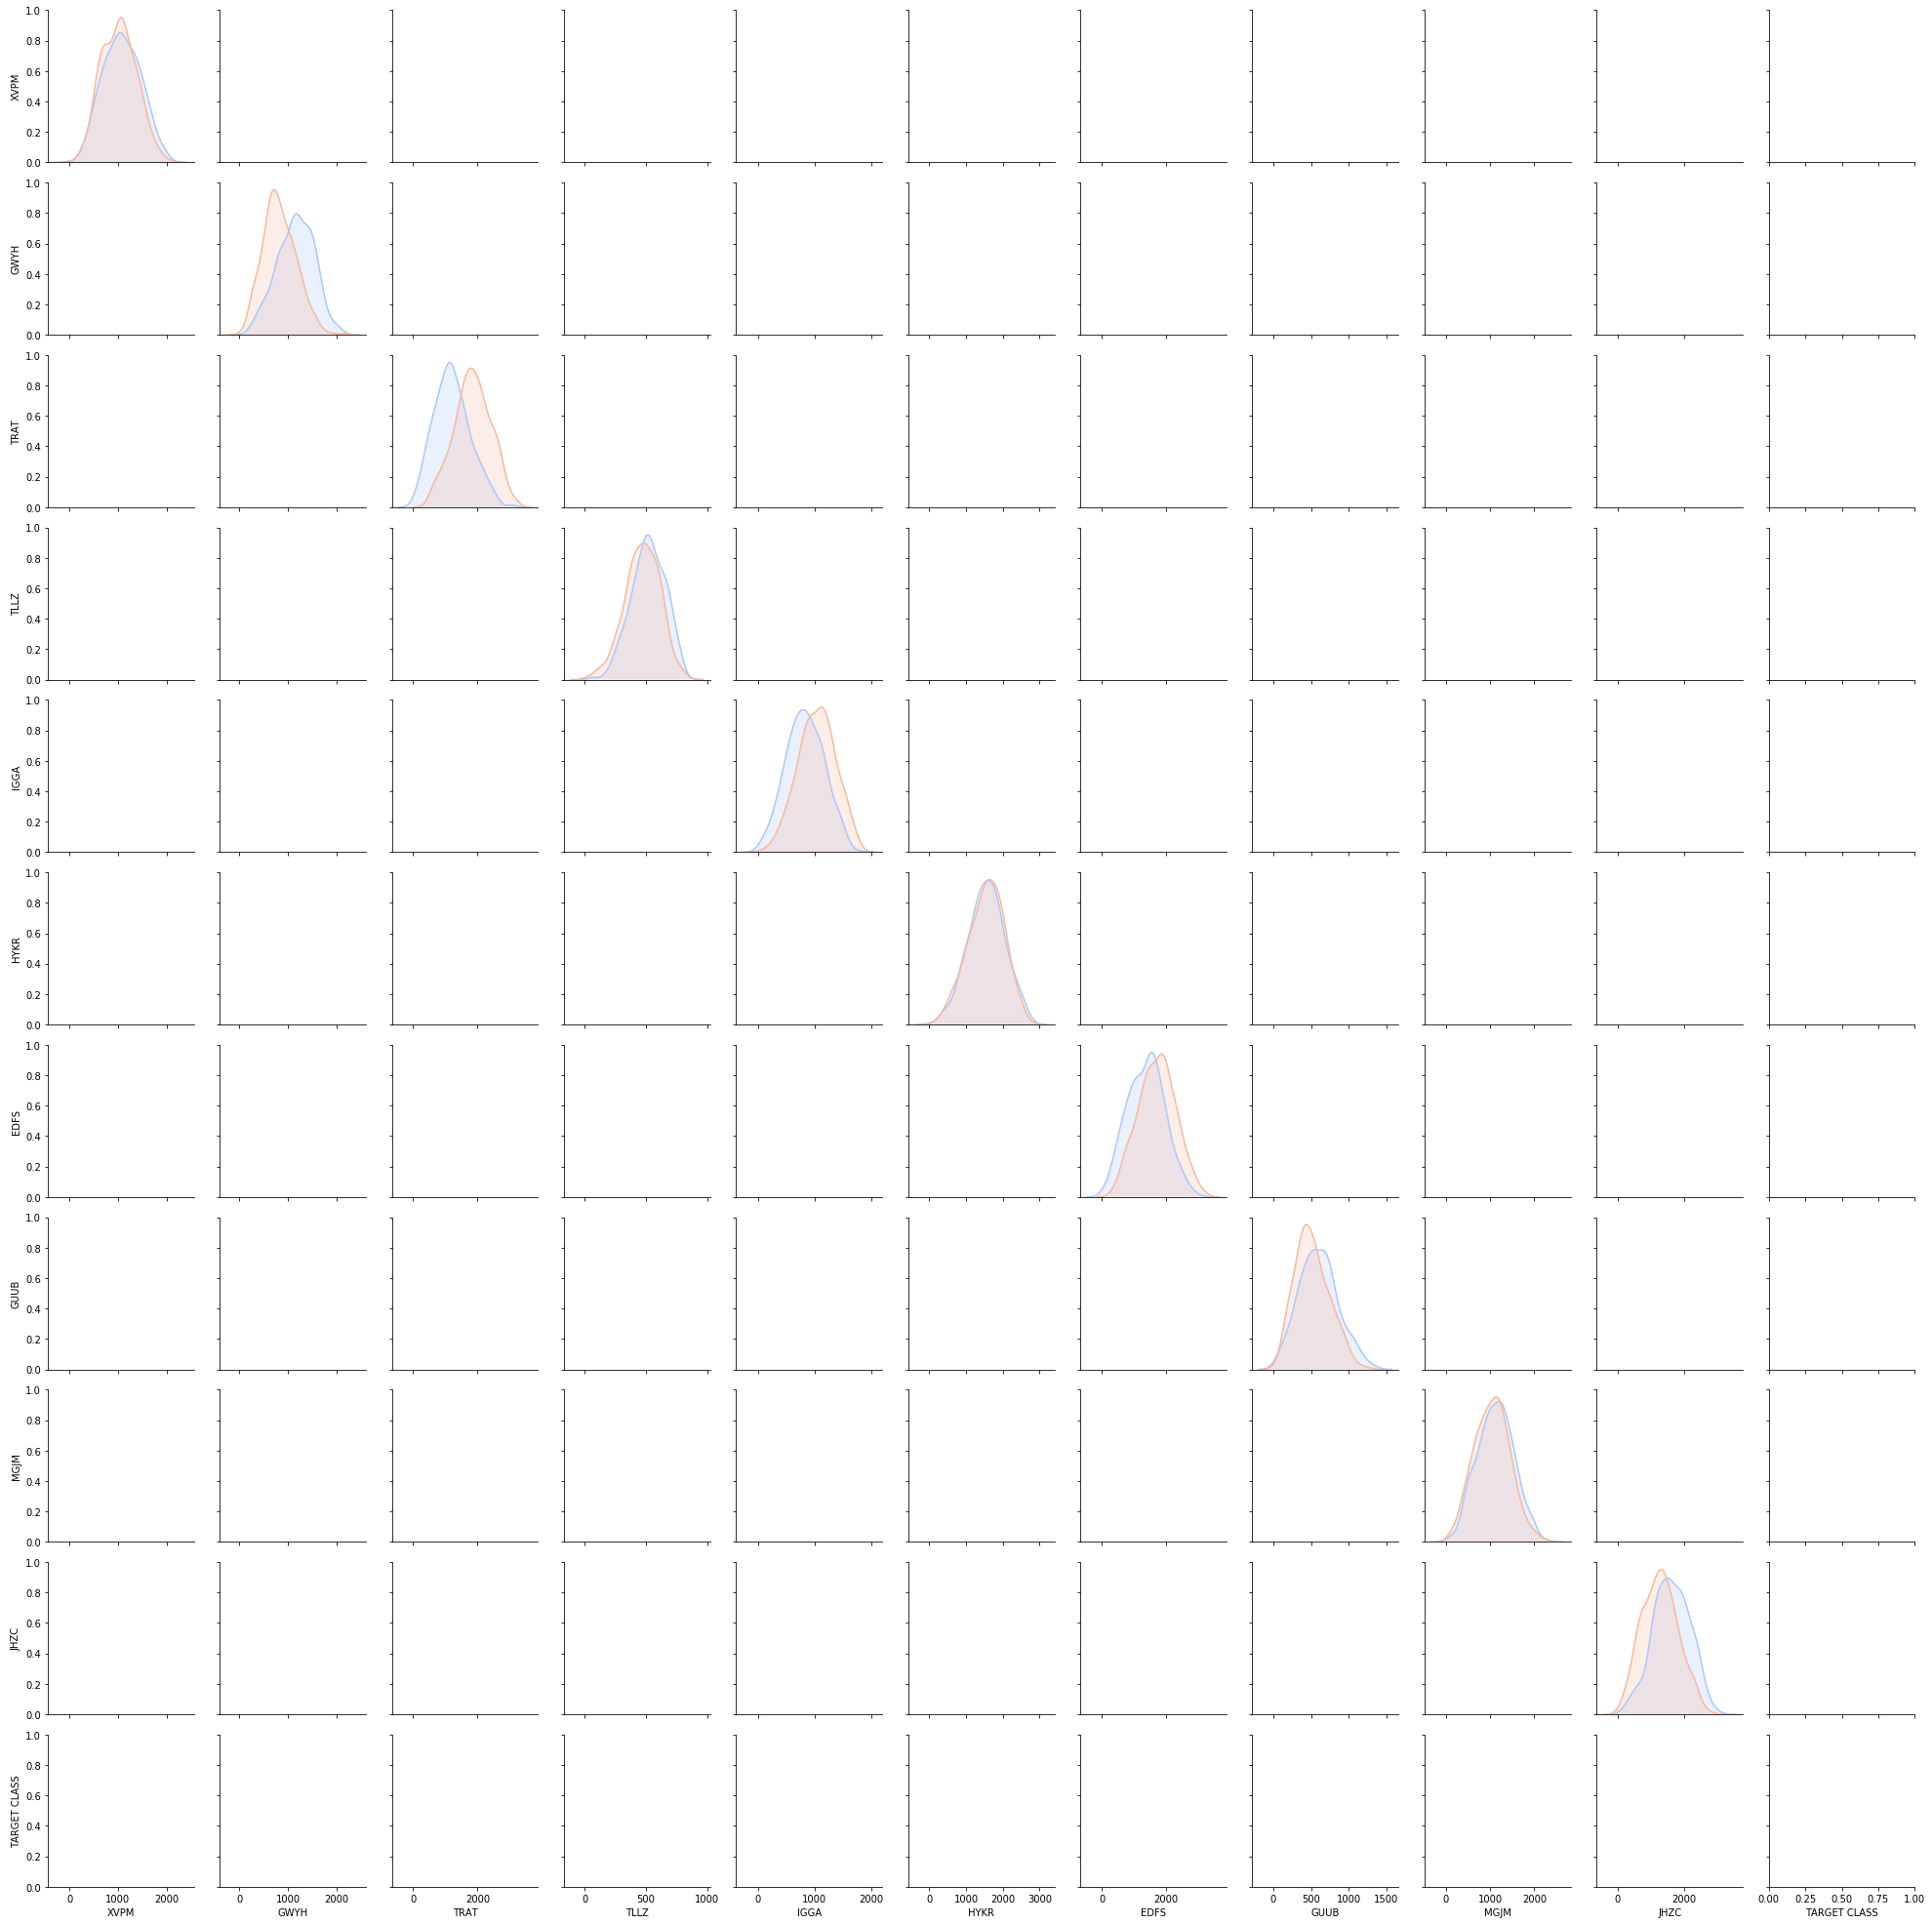

In [4]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [ ]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [ ]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

**Use the .transform() method to transform the features to a scaled version.**

In [ ]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [ ]:
knn.fit(X_train,y_train)

# Predictions and Evaluations


**Use the predict method to predict values using your KNN model and X_test.**

In [ ]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

In [ ]:
print(classification_report(y_test,pred))

# Choosing a K Value

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [ ]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))